In [58]:
import json
from src.data import DATA_DIR
from hazm import word_tokenize, sent_tokenize
from hazm import *
import nltk
from collections import Counter
from src.utils.io import read_file

In [59]:
stopwords = set(read_file(DATA_DIR / 'stopwords.txt').split('\n'))


In [60]:
with open(DATA_DIR / 'online.json') as f :
    data = json.load(f)

In [61]:
messages = iter(data['messages'])

In [62]:
def rebuild_msg(sub_messages):
    msg_text=''
    for sub_msg in sub_messages:
        if isinstance(sub_msg, str):
            msg_text += sub_msg
        elif 'text' in sub_msg:
            msg_text += sub_msg['text']
    return msg_text

In [63]:
for msg in messages:
    print(msg['text'])
    break

# Detect Questions

In [64]:
# q_msg = []

# q_tokens = []
# for msg in data['messages']:
#     if not isinstance(msg['text'], str):
#         msg['text'] = rebuild_msg(msg['text'])
#     sentences = sent_tokenize(msg['text'])
#     for sentence in sentences:
#         if "?" in msg['text'] or "؟" in msg['text']:
#             continue
#         q_msg.append(msg['text'])
#         tokens = word_tokenize(msg['text'])
#         q_tokens.extend(tokens)
        
is_question = defaultdict(bool)
for msg in data['messages']:
    if not isinstance(msg['text'], str):
        msg['text'] = rebuild_msg(msg['text'])
    sentences = sent_tokenize(msg['text'])
    for sentence in sentences:
        if "?" in msg['text'] or "؟" in msg['text']:
            continue
        is_question[msg['id']] = True
        break

In [65]:
# q_tokens = list(filter(lambda t: t not in stopwords , q_tokens))
# q_tokens

In [66]:
len(q_msg)

9458

In [67]:
Counter(q_tokens).most_common(40)

[('،', 2434),
 ('کنید', 1754),
 ('سلام', 1058),
 ('"', 1015),
 ('کار', 944),
 ('نیست', 903),
 ('https', 885),
 ('نصب', 883),
 ('های', 773),
 (']', 767),
 ('[', 763),
 ('می', 701),
 ('=', 648),
 ('باز', 629),
 ('-', 612),
 ('همون', 610),
 ('پایتون', 610),
 ('روی', 596),
 ('کلاس', 586),
 ('اینکه', 540),
 ('کد', 514),
 ('کردن', 512),
 ('فکر', 489),
 ('انجام', 488),
 ('خب', 484),
 ('حالا', 484),
 ('بشه', 479),
 ('ممنون', 471),
 ('میکنم', 466),
 ('کنه', 465),
 ('درست', 464),
 ('فایل', 457),
 ('کنین', 444),
 ('میکنه', 413),
 ('علی', 406),
 ('وقتی', 403),
 ('واقعا', 402),
 ('ارور', 397),
 ('بیشتر', 397),
 ('برنامه', 396)]

# Reply To Statistics

In [68]:
from collections import defaultdict

In [69]:

x = defaultdict(list)

In [70]:
users = []

# users = defaultdict(list)
for msg in data['messages']:
    if not msg.get('reply_to_message_id'):
        continue
    # users[msg['from_id']].append(msg['reply_to_message_id'])
    if is_question[msg['reply_to_message_id']] is False:
        continue
    users.append(msg['from'])

In [71]:
Counter(users).most_common(20)

[('AliReza Fereydouni', 481),
 ('Mohammad Ashrafy', 236),
 ('sina', 213),
 ('인권 침해', 174),
 ('Ali Hejazi', 162),
 ('Mahtab', 119),
 ('Shirin', 99),
 ('Koroshkorosh1', 75),
 (None, 74),
 ('Reza', 61),
 ('Jalal Alp.', 57),
 ('Maryam Kh', 45),
 ('Rezvan', 45),
 ('Omid', 43),
 ('Muhammad', 43),
 ('FE.honarvar', 43),
 ('Ablfzl', 42),
 ('Ali', 37),
 ('Maryam', 35),
 ('Mohammad', 34)]

In [73]:
bar_data = dict(Counter(users).most_common(10))
bar_data

{'AliReza Fereydouni': 481,
 'Mohammad Ashrafy': 236,
 'sina': 213,
 '인권 침해': 174,
 'Ali Hejazi': 162,
 'Mahtab': 119,
 'Shirin': 99,
 'Koroshkorosh1': 75,
 None: 74,
 'Reza': 61}

In [74]:
import seaborn as sns

<AxesSubplot:>

/home/matinus/anaconda3/envs/telegram_statistics/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/matinus/anaconda3/envs/telegram_statistics/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/matinus/anaconda3/envs/telegram_statistics/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/matinus/anaconda3/envs/telegram_statistics/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/matinus/anaconda3/envs/telegram_statistics/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51064 missing from curren

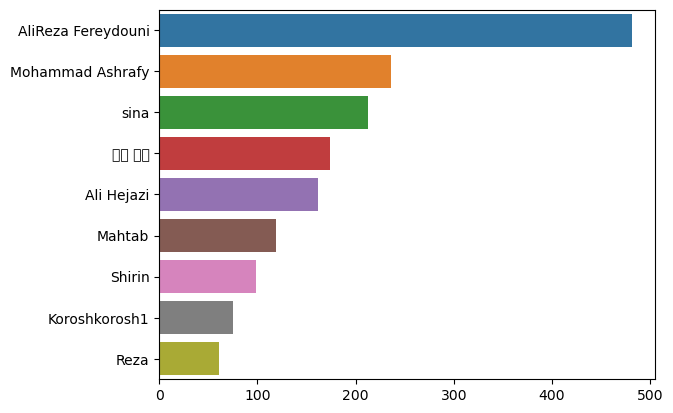

In [75]:
sns.barplot(y=list(bar_data.keys()), x=list(bar_data.values()))
# sns.barplot(y=reply_freq[:20],x=list(range(20)))

In [76]:
# reply_freq = sorted(list(map(len, users.values())), reverse=True)
# sns.barplot(y=reply_freq[:20],x=list(range(20)))

AttributeError: 'list' object has no attribute 'values'